# F1 Pit Strategy Optimiser - Racing Bulls

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fastf1
from fastf1 import plotting

In [193]:
# Loading data

practice_1 = fastf1.get_session(2025, 'Australia', 'FP1')
practice_2 = fastf1.get_session(2025, 'Australia', 'FP2')
practice_3 = fastf1.get_session(2025, 'Australia', 'FP3')

practice_1.load()
practice_2.load()
practice_3.load()

driver = 'TSU'  

laps_fp1 = practice_1.laps.pick_driver(driver)
laps_fp2 = practice_2.laps.pick_driver(driver)
laps_fp3 = practice_3.laps.pick_driver(driver)

# Merging
laps_fp1['session'] = 'FP1'
laps_fp2['session'] = 'FP2'
laps_fp3['session'] = 'FP3'

all_laps = pd.concat([laps_fp1, laps_fp2, laps_fp3], ignore_index=True)
 
    

all_laps.head()

core           INFO 	Loading data for Australian Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '7', '10', '12', '14', '16', '18', '22', '23', '27', '30', '31', '44', '55', '63', '81', '87']
core           INFO 	Loading data for Australian Grand Prix - Practice 2 [v3.5.3]
req            INFO 	Usin

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,session
0,0 days 00:17:21.314000,TSU,22,0 days 00:02:09.098000,1.0,1.0,0 days 00:15:18.707000,NaT,0 days 00:00:51.888000,0 days 00:00:21.487000,...,Racing Bulls,0 days 00:15:18.707000,2025-03-14 01:30:46.716,1,NaN,False,,False,False,FP1
1,0 days 00:18:42.827000,TSU,22,0 days 00:01:21.513000,2.0,1.0,NaT,NaT,0 days 00:00:28.466000,0 days 00:00:18.221000,...,Racing Bulls,0 days 00:17:21.314000,2025-03-14 01:32:49.323,1,NaN,False,,False,True,FP1
2,0 days 00:20:48.180000,TSU,22,0 days 00:02:05.353000,3.0,1.0,NaT,NaT,0 days 00:00:46.090000,0 days 00:00:29.058000,...,Racing Bulls,0 days 00:18:42.827000,2025-03-14 01:34:10.836,1,NaN,False,,False,True,FP1
3,0 days 00:22:07.544000,TSU,22,0 days 00:01:19.364000,4.0,1.0,NaT,NaT,0 days 00:00:27.526000,0 days 00:00:17.853000,...,Racing Bulls,0 days 00:20:48.180000,2025-03-14 01:36:16.189,1,NaN,False,,False,True,FP1
4,0 days 00:24:53.254000,TSU,22,NaT,5.0,1.0,NaT,0 days 00:24:30.714000,0 days 00:00:51.962000,0 days 00:00:35.143000,...,Racing Bulls,0 days 00:22:07.544000,2025-03-14 01:37:35.553,1,NaN,False,,False,False,FP1


In [194]:
all_laps.shape

(69, 32)

In [195]:
all_laps.info()

<class 'fastf1.core.Laps'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                69 non-null     timedelta64[ns]
 1   Driver              69 non-null     object         
 2   DriverNumber        69 non-null     object         
 3   LapTime             55 non-null     timedelta64[ns]
 4   LapNumber           69 non-null     float64        
 5   Stint               69 non-null     float64        
 6   PitOutTime          14 non-null     timedelta64[ns]
 7   PitInTime           14 non-null     timedelta64[ns]
 8   Sector1Time         68 non-null     timedelta64[ns]
 9   Sector2Time         68 non-null     timedelta64[ns]
 10  Sector3Time         58 non-null     timedelta64[ns]
 11  Sector1SessionTime  68 non-null     timedelta64[ns]
 12  Sector2SessionTime  68 non-null     timedelta64[ns]
 13  Sector3SessionTime  58 non-null     timedelta64[

In [196]:
all_laps.drop(columns=['Time', 'DriverNumber', 'Team', 'LapStartTime', 'IsPersonalBest'], inplace=True)

In [197]:
all_laps.loc[all_laps['LapTime'].isna(), ['Compound', 'LapTime', 'Deleted', 'DeletedReason', 'LapNumber']]

,Compound,LapTime,Deleted,DeletedReason,LapNumber
4,MEDIUM,NaT,False,,5.0
7,MEDIUM,NaT,False,,8.0
12,MEDIUM,NaT,False,,13.0
13,MEDIUM,NaT,False,,14.0
21,SOFT,NaT,False,,22.0
22,SOFT,NaT,False,,23.0
28,MEDIUM,NaT,False,,6.0
31,SOFT,NaT,False,,9.0
50,MEDIUM,NaT,False,,28.0
51,MEDIUM,NaT,False,,29.0


There is no data on tire degradation, so I will use a linear regression - plan in plan.txt

In [198]:
all_laps['Compound']

0     MEDIUM
1     MEDIUM
2     MEDIUM
3     MEDIUM
4     MEDIUM
       ...  
64      SOFT
65      SOFT
66      SOFT
67      SOFT
68      SOFT
Name: Compound, Length: 69, dtype: object

In [199]:
all_laps.loc[all_laps['FreshTyre'] == False, ['LapTime']]

,LapTime
5,0 days 00:02:02.590000
6,0 days 00:01:18.568000
7,NaT
8,0 days 00:01:46.485000
9,0 days 00:01:21.431000
10,0 days 00:01:20.788000
11,0 days 00:01:20.512000
12,NaT
13,NaT
14,0 days 00:02:13.243000


In [200]:
all_laps['Stint'].unique()

array([1., 2., 3., 4., 5., 6.])

Plotting lap times for tsunoda

In [201]:
prac_1_laps = all_laps.loc[all_laps['session'] == 'FP1']

In [202]:
# Drop all the rows where it is a slow lap
time_threshold = pd.Timedelta(minutes=1, seconds=40)    

fast_laps = prac_1_laps.loc[(prac_1_laps['LapTime'] > time_threshold) | (prac_1_laps['PitInTime'].notnull())]
fast_laps = list(fast_laps.index)

prac_1_laps.drop(fast_laps,axis=0, inplace=True)

C:\Users\chchr\AppData\Local\Temp\ipykernel_24944\3817254874.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prac_1_laps.drop(fast_laps,axis=0, inplace=True)


In [203]:
prac_1_laps.shape
prac_1_laps = prac_1_laps.reset_index(drop=True)
prac_1_laps['Compound'] = prac_1_laps['Compound'].str.strip().str.upper()
prac_1_laps['Compound'].unique()



array(['MEDIUM', 'SOFT'], dtype=object)

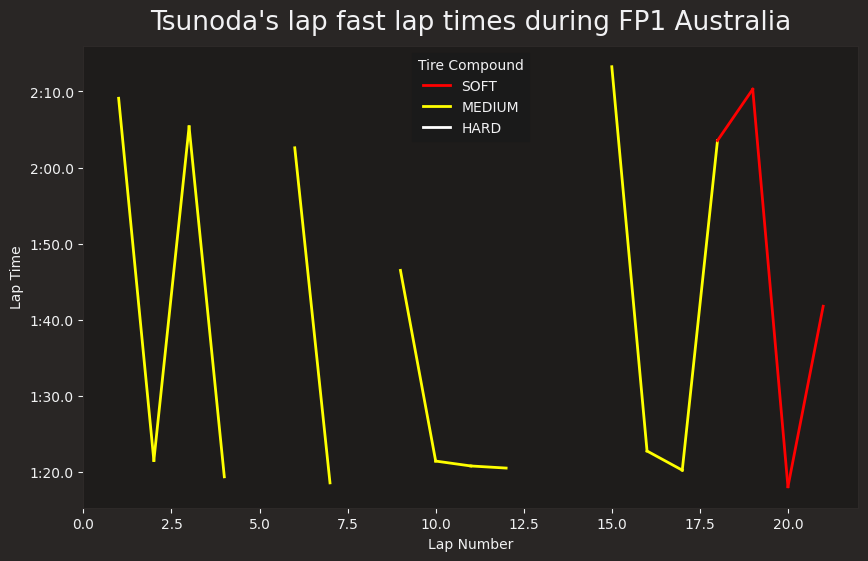

In [220]:
import matplotlib.lines as mlines


compound_colors = {
    'SOFT': 'red',    
    'MEDIUM': 'yellow',
    'HARD': 'white',

}


fig, ax = plt.subplots(figsize=(10,6))

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False, color_scheme='fastf1')
for i in range(0, len(prac_1_laps)):
    lap_1 = prac_1_laps.iloc[i - 1]
    lap_2 = prac_1_laps.iloc[i]
    
    compound_1 = lap_1['Compound']
    compound_2 = lap_2['Compound']
    
    color_1 = compound_colors.get(compound_1)  
    color_2 = compound_colors.get(compound_2)  

    ax.plot([lap_1['LapNumber'], lap_2['LapNumber']], 
            [lap_1['LapTime'], lap_2['LapTime']], 
            color=color_2, lw=2)

handles = []
for compound, color in compound_colors.items():
    line = mlines.Line2D([0], [0], color=color, lw=2)
    handles.append(line)
    
ax.legend(handles=handles, labels=compound_colors.keys(), title='Tire Compound')

ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time')
ax.set_title("Tsunoda's lap fast lap times during FP1 Australia") 
plt.savefig('plots/tsunoda_laptimes.png')

In [205]:
prac_1_laps = all_laps.loc[all_laps['session'] == 'FP1']

prac_1_laps.loc[prac_1_laps['Deleted'] == False, ['FreshTyre', 'LapTime', 'LapNumber', 'Compound']]

,FreshTyre,LapTime,LapNumber,Compound
0,True,0 days 00:02:09.098000,1.0,MEDIUM
1,True,0 days 00:01:21.513000,2.0,MEDIUM
2,True,0 days 00:02:05.353000,3.0,MEDIUM
3,True,0 days 00:01:19.364000,4.0,MEDIUM
4,True,NaT,5.0,MEDIUM
5,False,0 days 00:02:02.590000,6.0,MEDIUM
6,False,0 days 00:01:18.568000,7.0,MEDIUM
7,False,NaT,8.0,MEDIUM
8,False,0 days 00:01:46.485000,9.0,MEDIUM
9,False,0 days 00:01:21.431000,10.0,MEDIUM


On the 6th lap, the tyre is then classified as old.

We can model grip like this:

Speed vs. Throttle: If the throttle is high, but speed is low, the car might be struggling for grip.

Speed vs. Brake: If the car is braking hard but not slowing down quickly (low speed), it could indicate the tires aren't generating enough grip for effective braking.

RPM and Throttle: If the car is applying a lot of throttle but the RPM is low, this might suggest that grip is insufficient, causing wheel spin or less power delivery to the ground.

In [206]:
# Telemetry data for Tsunoda

session = fastf1.get_session(2025, 'Australia', 'FP1')
session.load()

driver_laps = session.laps.pick_driver('TSU')

all_telemetry = []

for lap_index, lap in driver_laps.iterlaps():
    telemetry = lap.get_telemetry()
    all_telemetry.append(telemetry)


telemetry_data = pd.concat(all_telemetry, ignore_index=True)
telemetry_data.head()

core           INFO 	Loading data for Australian Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '7', '10', '12', '14', '16', '18', '22', '23', '27', '30', '31', '44', '55', '63', '81', '87']
c:\Users\chchr\Python Projects\F1 Project\.venv\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
0,2025-03-14 01:30:46.716,0 days 00:15:18.707000,,230.339722,0 days 00:00:00,3436.008326,31.0,1,0.0,False,8,interpolation,8.419193e-07,1.616322e-10,OnTrack,-1275.817525,-1054.581211,2.229898e-24
1,2025-03-14 01:30:46.873,0 days 00:15:18.864000,,230.339722,0 days 00:00:00.157000,3419.000000,31.0,1,0.0,False,8,car,1.351944e+00,2.595472e-04,OnTrack,-1285.935868,-1045.012407,1.353031e-24
2,2025-03-14 01:30:46.908,0 days 00:15:18.899000,,230.339722,0 days 00:00:00.192000,3424.250010,31.0,1,0.0,False,8,pos,1.653334e+00,3.174081e-04,OnTrack,-1288.000000,-1043.000000,0.000000e+00
3,2025-03-14 01:30:47.113,0 days 00:15:19.104000,18,230.339722,0 days 00:00:00.397000,3455.000000,31.0,1,0.0,False,8,car,3.418611e+00,6.563072e-04,OnTrack,-1299.153454,-1031.829565,-2.845467e-24
4,2025-03-14 01:30:47.128,0 days 00:15:19.119000,18,230.735557,0 days 00:00:00.412000,3455.525002,31.0,1,0.0,False,8,pos,3.547779e+00,6.811049e-04,OnTrack,-1300.000000,-1031.000000,0.000000e+00


In [207]:
telemetry_data.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
0,2025-03-14 01:30:46.716,0 days 00:15:18.707000,,230.339722,0 days 00:00:00,3436.008326,31.0,1,0.0,False,8,interpolation,8.419193e-07,1.616322e-10,OnTrack,-1275.817525,-1054.581211,2.229898e-24
1,2025-03-14 01:30:46.873,0 days 00:15:18.864000,,230.339722,0 days 00:00:00.157000,3419.000000,31.0,1,0.0,False,8,car,1.351944e+00,2.595472e-04,OnTrack,-1285.935868,-1045.012407,1.353031e-24
2,2025-03-14 01:30:46.908,0 days 00:15:18.899000,,230.339722,0 days 00:00:00.192000,3424.250010,31.0,1,0.0,False,8,pos,1.653334e+00,3.174081e-04,OnTrack,-1288.000000,-1043.000000,0.000000e+00
3,2025-03-14 01:30:47.113,0 days 00:15:19.104000,18,230.339722,0 days 00:00:00.397000,3455.000000,31.0,1,0.0,False,8,car,3.418611e+00,6.563072e-04,OnTrack,-1299.153454,-1031.829565,-2.845467e-24
4,2025-03-14 01:30:47.128,0 days 00:15:19.119000,18,230.735557,0 days 00:00:00.412000,3455.525002,31.0,1,0.0,False,8,pos,3.547779e+00,6.811049e-04,OnTrack,-1300.000000,-1031.000000,0.000000e+00


Let's get the data we need (Speed, throttle, brake)

In [208]:
telemetry_data.info()

<class 'fastf1.core.Telemetry'>
RangeIndex: 28904 entries, 0 to 28903
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Date                   28904 non-null  datetime64[ns] 
 1   SessionTime            28904 non-null  timedelta64[ns]
 2   DriverAhead            28904 non-null  object         
 3   DistanceToDriverAhead  28904 non-null  float64        
 4   Time                   28904 non-null  timedelta64[ns]
 5   RPM                    28904 non-null  float64        
 6   Speed                  28904 non-null  float64        
 7   nGear                  28904 non-null  int64          
 8   Throttle               28904 non-null  float64        
 9   Brake                  28904 non-null  bool           
 10  DRS                    28904 non-null  int64          
 11  Source                 28904 non-null  object         
 12  Distance               28904 non-null  float64      

In [209]:
telemetry_data = telemetry_data.drop(columns=['Date', 'SessionTime', 'DriverAhead','DistanceToDriverAhead', 'nGear', 'DRS', 'Source', 'Distance', 'RelativeDistance', 'X', 'Y', 'Z'])
telemetry_data.head()


,Time,RPM,Speed,Throttle,Brake,Status
0,0 days 00:00:00,3436.008326,31.0,0.0,False,OnTrack
1,0 days 00:00:00.157000,3419.000000,31.0,0.0,False,OnTrack
2,0 days 00:00:00.192000,3424.250010,31.0,0.0,False,OnTrack
3,0 days 00:00:00.397000,3455.000000,31.0,0.0,False,OnTrack
4,0 days 00:00:00.412000,3455.525002,31.0,0.0,False,OnTrack


In [211]:
telemetry.to_csv('telemetry_data.csv', index=False)

In [214]:
driver_laps = session.laps.pick_driver('TSU')
driver_laps.info()

<class 'fastf1.core.Laps'>
Index: 23 entries, 221 to 243
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                23 non-null     timedelta64[ns]
 1   Driver              23 non-null     object         
 2   DriverNumber        23 non-null     object         
 3   LapTime             17 non-null     timedelta64[ns]
 4   LapNumber           23 non-null     float64        
 5   Stint               23 non-null     float64        
 6   PitOutTime          6 non-null      timedelta64[ns]
 7   PitInTime           6 non-null      timedelta64[ns]
 8   Sector1Time         22 non-null     timedelta64[ns]
 9   Sector2Time         22 non-null     timedelta64[ns]
 10  Sector3Time         19 non-null     timedelta64[ns]
 11  Sector1SessionTime  22 non-null     timedelta64[ns]
 12  Sector2SessionTime  22 non-null     timedelta64[ns]
 13  Sector3SessionTime  19 non-null     timedelta64[ns

c:\Users\chchr\Python Projects\F1 Project\.venv\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [215]:
driver_laps.info()

<class 'fastf1.core.Laps'>
Index: 23 entries, 221 to 243
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                23 non-null     timedelta64[ns]
 1   Driver              23 non-null     object         
 2   DriverNumber        23 non-null     object         
 3   LapTime             17 non-null     timedelta64[ns]
 4   LapNumber           23 non-null     float64        
 5   Stint               23 non-null     float64        
 6   PitOutTime          6 non-null      timedelta64[ns]
 7   PitInTime           6 non-null      timedelta64[ns]
 8   Sector1Time         22 non-null     timedelta64[ns]
 9   Sector2Time         22 non-null     timedelta64[ns]
 10  Sector3Time         19 non-null     timedelta64[ns]
 11  Sector1SessionTime  22 non-null     timedelta64[ns]
 12  Sector2SessionTime  22 non-null     timedelta64[ns]
 13  Sector3SessionTime  19 non-null     timedelta64[ns

In [218]:
tsunoda_laps = driver_laps[['Time', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime', 'PitInTime', 'Compound', 'TyreLife', 'FreshTyre', 'LapStartTime', 'LapStartDate']]

In [219]:
tsunoda_laps.to_csv('laptimes_data.csv', index=False)